In [45]:
using Distributions, ForwardDiff, LinearAlgebra, Gadfly, Cairo, Fontconfig

include("../precipFramework/plotting.jl");
include("CAVI.jl");
include("mcmc.jl");

# Artificial data

In [46]:
mu = 75.0;
sigma_2 = 100.0;

Y = rand(Normal(mu, sqrt(sigma_2)), 1000);

# Itérations

In [47]:
n_epoch = 10;
epoch_size = 1;
Hθ₀ = [1.0, 1.0, 0.0, 1.0];

MCKL, Hθ = runCAVI(n_epoch, epoch_size, Hθ₀, Y=Y);

Minimization made in 0.138789709 s


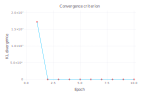

In [48]:
plotConvergenceCriterion(
    MCKL,
    # "../plots/demo/convergence_criterion.png",
)

In [41]:
α, β, m, s² = Hθ;

# Comparaison au MCMC

In [42]:
n_warming = 100;
n_iter = 10000;

θ = mcmc(n_iter, Y=Y);
θ̂ = θ[:, n_warming:end];

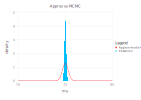

In [43]:
# Pour μ

approxDensity(x::Real) = pdf(Normal(m, sqrt(s²)), x);
a = 70;
b = 80;
step = .1;

plotApproxVSMCMC(
    approxDensity,
    θ̂[1, :],
    # "../plots/demo/approxvsmcmc_mu.png",
    a=a,
    b=b,
    step=step,
    xLabel="mu",
    yLabel="density",
)

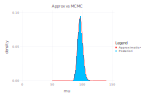

In [44]:
# Pour σ²

approxDensity(x::Real) = pdf(InverseGamma(α, β), x);
a = 50;
b = 140;
step = .1;

plotApproxVSMCMC(
    approxDensity,
    θ̂[2, :],
    # "../plots/demo/approxvsmcmc_mu.png",
    a=a,
    b=b,
    step=step,
    xLabel="mu",
    yLabel="density",
)